In [1]:
from google.colab import drive
#mount you GoogleDrive to "drive" folder
drive.mount('/drive', force_remount=False)

path = "/drive/MyDrive/IS/ga_dataset/"

Mounted at /drive


In [2]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv(path + "for_baseline.csv",
                  parse_dates=["date"],
                 index_col=["date"]) # parse the date column (tell pandas column 1 is a datetime)

# change [avg_session_duration] to second
# df['avg_session_duration'] = pd.to_timedelta(df['avg_session_duration']).dt.total_seconds()

df.head()

,sessions
date,
2016-01-01,1929
2016-01-02,1530
2016-01-03,1567
2016-01-04,1938
2016-01-05,1840


In [3]:
df.dtypes

sessions    int64
dtype: object

In [ ]:
# df = df.reset_index()

In [4]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

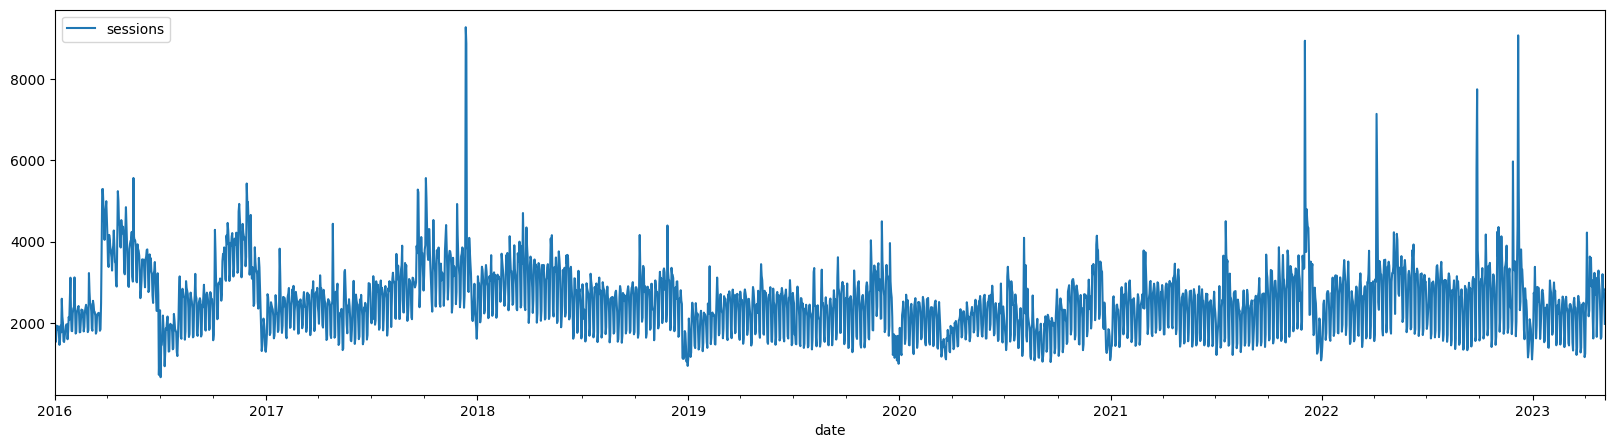

In [5]:
df.plot(figsize = (20, 5), legend = True);

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Set train-test split ratio
train_ratio = 0.8

# Calculate the index to split the data into train and test sets
split_index = int(len(df) * train_ratio)

# Split the data into train and test sets
train_data = df[:split_index]
test_data = df[split_index:]

# Convert the train and test data to arrays
train_values = train_data['sessions'].values
test_values = test_data['sessions'].values

# Fit the ARIMA model
# model = ARIMA(train_values, order=(1, 1, 1))
model = ARIMA(train_values, order=(2, 1, 3))
model_fit = model.fit()

# Forecast values for the test set
forecast_values = model_fit.forecast(len(test_values))

# Calculate evaluation metrics
mae = mean_absolute_error(test_values, forecast_values)
mse = mean_squared_error(test_values, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_values - forecast_values) / test_values)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 840.7012046382731
Mean Squared Error (MSE): 1193036.5468514818
Root Mean Squared Error (RMSE): 1092.2621236916905
Mean Absolute Percentage Error (MAPE): 41.42969719973878


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ใช้อันนี้ๆ ทำนายล่วงหน้า

In [7]:
# Fit the ARIMA model
model = ARIMA(df['sessions'].values, order=(2, 1, 3))
model_fit = model.fit()

# Forecast values for the next 14 days
forecast_values = model_fit.forecast(steps=14)

# Print the forecasted values
print("Forecasted values for the next 14 days:")
print(forecast_values)


Forecasted values for the next 14 days:
[2044.16762216 2577.46543803 3133.74068802 3294.1160154  2937.94220578
 2333.56161818 1936.13834057 2044.8703286  2577.73989516 3133.3803531
 3293.39239756 2937.40028642 2333.60940681 1936.7396857 ]


In [8]:
# Fit the ARIMA model
model = ARIMA(df['sessions'].values, order=(2, 1, 3))
model_fit = model.fit()

# Forecast values for the next 14 days
forecast_values = model_fit.forecast(steps=14)  # Extracting only the forecasted values

# Calculate evaluation metrics for the forecasted values
test_values = df['sessions'].values[-14:]  # Extracting the actual test values from the last 14 days
mae = mean_absolute_error(test_values, forecast_values)
mse = mean_squared_error(test_values, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_values - forecast_values) / test_values)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Error (MAE): 230.78984956010586
Mean Squared Error (MSE): 79184.30566592437
Root Mean Squared Error (RMSE): 281.39706051400816
Mean Absolute Percentage Error (MAPE): 9.533567109469224


**https://machinelearningmastery.com/make-sample-forecasts-arima-python/ <br>
 https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/**

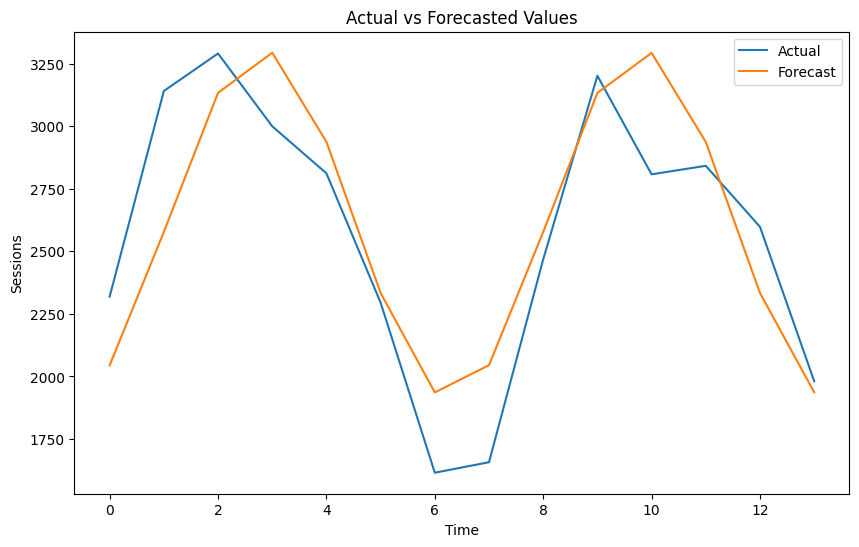

In [9]:
import matplotlib.pyplot as plt

# Plot the actual test values and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_values, label='Actual')
plt.plot(forecast_values, label='Forecast')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Sessions')
plt.legend()
plt.show()


# keep

In [ ]:
# from pandas import read_csv
# from statsmodels.tsa.arima.model import ARIMA
# import numpy

# # create a differenced series
# def difference(dataset, interval=1):
# 	diff = list()
# 	for i in range(interval, len(dataset)):
# 		value = dataset[i] - dataset[i - interval]
# 		diff.append(value)
# 	return numpy.array(diff)

# # invert differenced value
# def inverse_difference(history, yhat, interval=1):
# 	return yhat + history[-interval]

# # # load dataset
# # series = read_csv(path + 'for_baseline.csv', header=0)
# # seasonal difference
# X = df.values
# days_in_year = 365
# differenced = difference(X, days_in_year)
# # fit model
# model = ARIMA(differenced, order=(2,1,3))
# model_fit = model.fit()
# # multi-step out-of-sample forecast
# start_index = len(differenced)
# end_index = start_index + 13
# forecast = model_fit.predict(start=start_index, end=end_index)
# # invert the differenced forecast to something usable
# history = [x for x in X]
# day = 1
# for yhat in forecast:
# 	inverted = inverse_difference(history, yhat, days_in_year)
# 	print('Day %d: %f' % (day, inverted))
# 	history.append(inverted)
# 	day += 1

Day 1: 2174.847445
Day 2: 1907.595528
Day 3: 2925.365374
Day 4: 2856.691950
Day 5: 3640.880985
Day 6: 3580.192396
Day 7: 2738.123455
Day 8: 2135.346734
Day 9: 2143.351095
Day 10: 2759.492714
Day 11: 2795.971175
Day 12: 2657.787550
Day 13: 3084.301096
Day 14: 2292.978122


In [10]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# load dataset
# series = read_csv(path + 'for_baseline.csv', header=0)
# seasonal difference
X = df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(2, 1, 3))
model_fit = model.fit()
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 13
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    # Calculate evaluation metrics
    true_value = X[start_index + day - 1]
    mae = mean_absolute_error([true_value], [inverted])
    mse = mean_squared_error([true_value], [inverted])
    rmse = np.sqrt(mse)
    # mape = np.abs((true_value - inverted) / true_value) * 100
    mape = np.abs((true_value - inverted) / true_value)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    day += 1

# Print the evaluation metrics for each day
print("\nEvaluation Metrics for each day:")
print("Day\tMAE\t\tMSE\t\tRMSE\t\tMAPE")
for i in range(len(forecast)):
    print("%d\t%f\t%f\t%f\t%f" % (i + 1, mae_list[i], mse_list[i], rmse_list[i], mape_list[i]))

# Calculate overall evaluation metrics
mean_mae = np.mean(mae_list)
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_mape = np.mean(mape_list)

print("\nOverall Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_mae)
print("Mean Squared Error (MSE):", mean_mse)
print("Root Mean Squared Error (RMSE):", mean_rmse)
print("Mean Absolute Percentage Error (MAPE):", mean_mape)


Day 1: 2174.847445
Day 2: 1907.595528
Day 3: 2925.365374
Day 4: 2856.691950
Day 5: 3640.880985
Day 6: 3580.192396
Day 7: 2738.123455
Day 8: 2135.346734
Day 9: 2143.351095
Day 10: 2759.492714
Day 11: 2795.971175
Day 12: 2657.787550
Day 13: 3084.301096
Day 14: 2292.978122

Evaluation Metrics for each day:
Day	MAE		MSE		RMSE		MAPE
1	1215.152555	1476595.732238	1215.152555	0.358452
2	317.404472	100745.598780	317.404472	0.142654
3	367.634626	135155.218008	367.634626	0.111641
4	775.308050	601102.572161	775.308050	0.213466
5	552.119015	304835.406815	552.119015	0.131676
6	464.807604	216046.109060	464.807604	0.114909
7	614.876545	378073.165177	614.876545	0.183381
8	583.653266	340651.134891	583.653266	0.214657
9	526.648905	277359.068702	526.648905	0.197247
10	569.507286	324338.548775	569.507286	0.171075
11	576.028825	331809.206656	576.028825	0.170827
12	552.212450	304938.590219	552.212450	0.172029
13	560.698904	314383.260490	560.698904	0.153827
14	568.021878	322648.854161	568.021878	0.198540

Ove

In [11]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# load dataset
# series = read_csv(path + 'for_baseline.csv', header=0)
# seasonal difference
X = df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(2, 1, 3))
model_fit = model.fit()
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 13
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
predictions = []
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: True Value=%f, Predicted Value=%f' % (day, X[start_index + day - 1], inverted))
    history.append(inverted)
    # Calculate evaluation metrics
    true_value = X[start_index + day - 1]
    predictions.append((true_value, inverted))
    mae = mean_absolute_error([true_value], [inverted])
    mse = mean_squared_error([true_value], [inverted])
    rmse = np.sqrt(mse)
    # mape = np.abs((true_value - inverted) / true_value) * 100
    mape = np.abs((true_value - inverted) / true_value)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    day += 1

# Print the evaluation metrics for each day
print("\nEvaluation Metrics for each day:")
print("Day\tMAE\t\tMSE\t\tRMSE\t\tMAPE")
for i in range(len(predictions)):
    true_value, inverted = predictions[i]
    mae = mae_list[i]
    mse = mse_list[i]
    rmse = rmse_list[i]
    mape = mape_list[i]
    print("%d\t%f\t%f\t%f\t%f" % (i + 1, mae, mse, rmse, mape))

# Calculate overall evaluation metrics
mean_mae = np.mean(mae_list)
mean_mse = np.mean(mse_list)
mean_rmse = np.mean(rmse_list)
mean_mape = np.mean(mape_list)

print("\nOverall Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mean_mae)
print("Mean Squared Error (MSE):", mean_mse)
print("Root Mean Squared Error (RMSE):", mean_rmse)
print("Mean Absolute Percentage Error (MAPE):", mean_mape)

Day 1: True Value=3390.000000, Predicted Value=2174.847445
Day 2: True Value=2225.000000, Predicted Value=1907.595528
Day 3: True Value=3293.000000, Predicted Value=2925.365374
Day 4: True Value=3632.000000, Predicted Value=2856.691950
Day 5: True Value=4193.000000, Predicted Value=3640.880985
Day 6: True Value=4045.000000, Predicted Value=3580.192396
Day 7: True Value=3353.000000, Predicted Value=2738.123455
Day 8: True Value=2719.000000, Predicted Value=2135.346734
Day 9: True Value=2670.000000, Predicted Value=2143.351095
Day 10: True Value=3329.000000, Predicted Value=2759.492714
Day 11: True Value=3372.000000, Predicted Value=2795.971175
Day 12: True Value=3210.000000, Predicted Value=2657.787550
Day 13: True Value=3645.000000, Predicted Value=3084.301096
Day 14: True Value=2861.000000, Predicted Value=2292.978122

Evaluation Metrics for each day:
Day	MAE		MSE		RMSE		MAPE
1	1215.152555	1476595.732238	1215.152555	0.358452
2	317.404472	100745.598780	317.404472	0.142654
3	367.634626	